In [200]:
file = open('nps_apikey.txt', 'r') 
api_key = file.read().strip()

In [197]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [201]:
import requests

# Read your API key from a text file
with open('nps_apikey.txt', 'r') as file:
    api_key = file.read().strip()

# Construct the API URL
base_url = 'https://developer.nps.gov/api/v1/campgrounds'
# Define the state codes as a comma-delimited string
#state_codes = 'chis, seki, yose' 'parkCode': state_codes
params = {'api_key': api_key, 'limit': 638 }#state_codes = 'CA,OR,WA,UT' 'stateCode': state_codes

# Make the API request
response = requests.get(base_url, params=params)

# Check the response status code
if response.status_code == 200:
    # Request was successful
    data = response.json()
    data = pd.json_normalize(data,'data')
else:
    # Request failed
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    

In [202]:
data.head()

,id,url,name,parkCode,description,latitude,longitude,latLong,audioDescription,isPassportStampLocation,passportStampLocationDescription,passportStampImages,geometryPoiId,reservationInfo,reservationUrl,regulationsurl,regulationsOverview,fees,directionsOverview,directionsUrl,operatingHours,addresses,images,weatherOverview,numberOfSitesReservable,numberOfSitesFirstComeFirstServe,multimedia,relevanceScore,lastIndexedDate,amenities.trashRecyclingCollection,amenities.toilets,amenities.internetConnectivity,amenities.showers,amenities.cellPhoneReception,amenities.laundry,amenities.amphitheater,amenities.dumpStation,amenities.campStore,amenities.staffOrVolunteerHostOnsite,amenities.potableWater,amenities.iceAvailableForSale,amenities.firewoodForSale,amenities.foodStorageLockers,contacts.phoneNumbers,contacts.emailAddresses,campsites.totalSites,campsites.group,campsites.horse,campsites.tentOnly,campsites.electricalHookups,campsites.rvOnly,campsites.walkBoatTo,campsites.other,accessibility.wheelchairAccess,accessibility.internetInfo,accessibility.cellPhoneInfo,accessibility.fireStovePolicy,accessibility.rvAllowed,accessibility.rvInfo,accessibility.rvMaxLength,accessibility.additionalInfo,accessibility.trailerMaxLength,accessibility.adaInfo,accessibility.trailerAllowed,accessibility.accessRoads,accessibility.classifications
0,EA81BC45-C361-437F-89B8-5C89FB0D0F86,https://www.nps.gov/amis/planyourvisit/277-nor...,277 North Campground,amis,277 North Campground is generally open year-ro...,29.512373695509215,-100.90816633365614,"{lat:29.512373695509215, lng:-100.90816633365614}",277 North Campground is generally open year-ro...,0,,[],582AB459-28A8-453A-B22E-BAD481E92098,"Standard overnight camping is first-come, firs...",https://www.recreation.gov/camping/campgrounds...,https://cms.nps.gov/amis/learn/management/comp...,Site capacity is not to exceed eight persons a...,"[{'cost': '6.00', 'description': 'Sites are av...",Directions from Amistad National Recreation Ar...,,"[{'exceptions': [], 'description': '277 North ...",[],"[{'credit': 'NPS Photo', 'crops': [], 'title':...",The climate at Amistad is semi-arid in moistur...,1,17,[],1.0,,Yes - year round,[Vault Toilets - year round],No,[None],Yes - year round,No,No,No,No,No,[No water],No,No,No,[],"[{'description': '', 'emailAddress': 'AMIS_Int...",18,1,0,0,0,0,0,0,"Limited. However, some sites do have a cement ...",,,Ground fires are not permitted. Each campsite ...,1,RV and Trailers are permitted,0,,0,The main road leading to the campground is pav...,1,[Paved Roads - All vehicles OK],[Limited Development Campground]
1,1241C56B-7003-4FDF-A449-29DA8BCB0A41,,Abrams Creek Campground,grsm,"Abrams Creek Campground—elevation 1,125 feet (...",35.61074664664336,-83.93318327404131,"{lat:35.61074664664336, lng:-83.93318327404131}",A pristine creek is the backdrop for your camp...,0,,[],166CDAB3-554B-4409-B2F0-211650614BA0,Campsite reservations are required and may be ...,https://www.recreation.gov/camping/campgrounds...,http://www.nps.gov/grsm/planyourvisit/campregs...,All food and equipment used to prepare and sto...,"[{'cost': '30.00', 'description': 'Camping Fee...",,,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '37878', 'city': 'Tallassee', ...","[{'credit': 'NPS Photo', 'crops': [], 'title':...",This campground is in the mountains and weathe...,16,0,[],1.0,,Yes - seasonal,[Flush Toilets - seasonal],No,[None],No,No,No,No,No,Yes - seasonal,[Yes - seasonal],No,No,No,"[{'phoneNumber': '865-856-2445', 'description'...","[{'description': '', 'emailAddress': 'GRSM_Smo...",16,0,0,4,0,0,0,0,Campground is not ADA accessible.,,,Fires are permitted only in established fire r...,1,RVs and trailers not recommended because of wi...,0,,12,Campground is not ADA accessible. A paved path...,1,[Unpaved Roads - All vehicles OK in good weather],[Developed Campground]
2,ABDC6E2A-9959-4A4C-9DB6-EEF66E7C95B8,https://www.recreation.gov/camping/campgrounds...,Adirondack Shelters,cato,Reservations Required

In [203]:
#What is the most expensive campsite
data.columns

Index(['id', 'url', 'name', 'parkCode', 'description', 'latitude', 'longitude',
       'latLong', 'audioDescription', 'isPassportStampLocation',
       'passportStampLocationDescription', 'passportStampImages',
       'geometryPoiId', 'reservationInfo', 'reservationUrl', 'regulationsurl',
       'regulationsOverview', 'fees', 'directionsOverview', 'directionsUrl',
       'operatingHours', 'addresses', 'images', 'weatherOverview',
       'numberOfSitesReservable', 'numberOfSitesFirstComeFirstServe',
       'multimedia', 'relevanceScore', 'lastIndexedDate',
       'amenities.trashRecyclingCollection', 'amenities.toilets',
       'amenities.internetConnectivity', 'amenities.showers',
       'amenities.cellPhoneReception', 'amenities.laundry',
       'amenities.amphitheater', 'amenities.dumpStation',
       'amenities.campStore', 'amenities.staffOrVolunteerHostOnsite',
       'amenities.potableWater', 'amenities.iceAvailableForSale',
       'amenities.firewoodForSale', 'amenities.foodStora

In [204]:
data = data[['id', #'url', 
      'name', 'parkCode', 
      #'description', 
      'latitude', 'longitude',
       #'latLong', #'audioDescription', 'isPassportStampLocation',
       #'passportStampLocationDescription', 'passportStampImages',
       #'geometryPoiId', 'reservationInfo', 'reservationUrl', 'regulationsurl',
       #'regulationsOverview', 
       'fees', #'directionsOverview', 'directionsUrl',
       #'operatingHours', 
       'addresses', #'images', 
       #'weatherOverview',
       'numberOfSitesReservable', 'numberOfSitesFirstComeFirstServe',
       #'multimedia', 'relevanceScore', 'lastIndexedDate',
       #'amenities.trashRecyclingCollection', 
       #'amenities.toilets',
       #'amenities.internetConnectivity', 'amenities.showers',
       #'amenities.cellPhoneReception', 'amenities.laundry',
       #'amenities.amphitheater', 
       #'amenities.dumpStation',
       #'amenities.campStore', 
       #'amenities.staffOrVolunteerHostOnsite',
       #'amenities.potableWater', 'amenities.iceAvailableForSale',
       #'amenities.firewoodForSale', 'amenities.foodStorageLockers',
       #'contacts.phoneNumbers', #'contacts.emailAddresses',
       #'campsites.totalSites', 'campsites.group', 'campsites.horse',
       #'campsites.tentOnly', 'campsites.electricalHookups', 'campsites.rvOnly',
       #'campsites.walkBoatTo', 'campsites.other',
       #'accessibility.wheelchairAccess', 'accessibility.internetInfo',
       #'accessibility.cellPhoneInfo', 
       #'accessibility.fireStovePolicy',
       #'accessibility.rvAllowed', 'accessibility.rvInfo',
       #'accessibility.rvMaxLength', 'accessibility.additionalInfo',
       #'accessibility.trailerMaxLength', 'accessibility.adaInfo',
       #'accessibility.trailerAllowed', 'accessibility.accessRoads',
       'accessibility.classifications']].copy()

In [205]:
data.shape

(638, 10)

In [206]:
data.columns

Index(['id', 'name', 'parkCode', 'latitude', 'longitude', 'fees', 'addresses',
       'numberOfSitesReservable', 'numberOfSitesFirstComeFirstServe',
       'accessibility.classifications'],
      dtype='object')

In [207]:
data.dtypes

id                                  object
name                                object
parkCode                            object
latitude                            object
longitude                           object
fees                                object
addresses                           object
numberOfSitesReservable             object
numberOfSitesFirstComeFirstServe    object
accessibility.classifications       object
dtype: object

In [208]:
data.describe

<bound method NDFrame.describe of                                        id  \
0    EA81BC45-C361-437F-89B8-5C89FB0D0F86   
1    1241C56B-7003-4FDF-A449-29DA8BCB0A41   
2    ABDC6E2A-9959-4A4C-9DB6-EEF66E7C95B8   
3    4F9ED6A5-3ED1-443D-9E4C-859D7988F199   
4    9FAE941D-D7E8-4F36-A28F-8556628242BA   
..                                    ...   
633  A1EAF11C-75D8-484B-8BB2-985F61951BAD   
634  B94FE8B9-2EF1-4464-A2E1-5803C9AE7648   
635  BF1E54D4-20CA-48F4-85ED-DBE673A14696   
636  CCDC908D-4B98-46C9-83BB-AFE6EF2E9869   
637  025AFF52-097D-4754-8952-5A554386CE62   

                                    name parkCode            latitude  \
0                   277 North Campground     amis  29.512373695509215   
1                Abrams Creek Campground     grsm   35.61074664664336   
2                    Adirondack Shelters     cato   39.67775041640082   
3                    Afterbay Campground     bica  45.315438210045016   
4                 Akers Group Campground     ozar       37.3

In [209]:
data.isna().sum()

id                                  0
name                                0
parkCode                            0
latitude                            0
longitude                           0
fees                                0
addresses                           0
numberOfSitesReservable             0
numberOfSitesFirstComeFirstServe    0
accessibility.classifications       0
dtype: int64

In [210]:
data

,id,name,parkCode,latitude,longitude,fees,addresses,numberOfSitesReservable,numberOfSitesFirstComeFirstServe,accessibility.classifications
0,EA81BC45-C361-437F-89B8-5C89FB0D0F86,277 North Campground,amis,29.512373695509215,-100.90816633365614,"[{'cost': '6.00', 'description': 'Sites are av...",[],1,17,[Limited Development Campground]
1,1241C56B-7003-4FDF-A449-29DA8BCB0A41,Abrams Creek Campground,grsm,35.61074664664336,-83.93318327404131,"[{'cost': '30.00', 'description': 'Camping Fee...","[{'postalCode': '37878', 'city': 'Tallassee', ...",16,0,[Developed Campground]
2,ABDC6E2A-9959-4A4C-9DB6-EEF66E7C95B8,Adirondack Shelters,cato,39.67775041640082,-77.48462720159597,"[{'cost': '10.00', 'description': 'A reservati...","[{'postalCode': '21788', 'city': 'Thurmont', '...",2,0,[Primitive Camping Areas]
3,4F9ED6A5-3ED1-443D-9E4C-859D7988F199,Afterbay Campground,bica,45.315438210045016,-107.94165891102676,"[{'cost': '35.00', 'description': 'Sites with ...","[{'postalCode': '59035', 'city': 'Fort Smith',...",22,0,[Limited Development Campground]
4,9FAE941D-D7E8-4F36-A28F-8556628242BA,Akers Group Campground,ozar,37.3764551871,-91.5615463252,"[{'cost': '65.00', 'description': 'Summer grou...","[{'postalCode': '65466', 'city': 'Eminence', '...",4,4,[Designated Primitive Campsites]
...,...,...,...,...,...,...,...,...,...,...
633,A1EAF11C-75D8-484B-8BB2-985F61951BAD,Wood Lake Campground,isro,48.00853512034862,-88.73960933467993,"[{'cost': '0.00', 'description': 'No fee for s...","[{'postalCode': '49931', 'city': 'Houghton', '...",0,3,[Primitive Camping Areas]
634,B94FE8B9-2EF1-4464-A2E1-5803C9AE7648,Woolum,buff,35.9703114997,-92.8805197992,"[{'cost': '0.00', 'description': 'There is no ...","[{'postalCode': '72675', 'city': 'St. Joe', 's...",0,0,[Primitive Camping Areas]
635,BF1E54D4-20CA-48F4-85ED-DBE673A14696,Worthington State Forest Campground,dewa,41.01296000001025,-75.08484440122811,[],"[{'postalCode': '07832', 'city': 'Columbia', '...",78,0,[]
636,CCDC908D-4B98-46C9-83BB-AFE6EF2E9869,Yankee Paradise Wilderness Campsite,cuis,30.8492,-81.4478,"[{'cost': '9.00', 'description': 'Permits are ...",[],4,0,[Designated Primitive Campsites]


In [211]:
# Split 'fees' column into 'fees' and 'description'
data[['cost', 'description']] = pd.DataFrame(data['fees'].apply(lambda x: [x[0]['cost'], x[0]['description']] if x else [None, None]).tolist(), index=data.index)
# Split 'addresses' column into 'zip' and 'city'
data[['zip', 'city']] = pd.DataFrame(data['addresses'].apply(lambda x: [x[0]['postalCode'], x[0]['city']] if x else [None, None]).tolist(), index=data.index)
# Drop the original 'fees' and 'addresses' columns
data = data.drop(['fees', 'addresses'], axis=1)
# Print the updated DataFrame
print(data)


                                       id  \
0    EA81BC45-C361-437F-89B8-5C89FB0D0F86   
1    1241C56B-7003-4FDF-A449-29DA8BCB0A41   
2    ABDC6E2A-9959-4A4C-9DB6-EEF66E7C95B8   
3    4F9ED6A5-3ED1-443D-9E4C-859D7988F199   
4    9FAE941D-D7E8-4F36-A28F-8556628242BA   
..                                    ...   
633  A1EAF11C-75D8-484B-8BB2-985F61951BAD   
634  B94FE8B9-2EF1-4464-A2E1-5803C9AE7648   
635  BF1E54D4-20CA-48F4-85ED-DBE673A14696   
636  CCDC908D-4B98-46C9-83BB-AFE6EF2E9869   
637  025AFF52-097D-4754-8952-5A554386CE62   

                                    name parkCode            latitude  \
0                   277 North Campground     amis  29.512373695509215   
1                Abrams Creek Campground     grsm   35.61074664664336   
2                    Adirondack Shelters     cato   39.67775041640082   
3                    Afterbay Campground     bica  45.315438210045016   
4                 Akers Group Campground     ozar       37.3764551871   
..                   

In [212]:
data.columns

Index(['id', 'name', 'parkCode', 'latitude', 'longitude',
       'numberOfSitesReservable', 'numberOfSitesFirstComeFirstServe',
       'accessibility.classifications', 'cost', 'description', 'zip', 'city'],
      dtype='object')

In [218]:
#rename columns
camp_data = data.rename(columns={'id': 'ID', 'name':'Name', 'parkCode': 'Park Code','latitude': 'Latitude', 'longitude':'Longitude','numberOfSitesReservable' :'Number Of Sites Reservable','numberOfSitesFirstComeFirstServe' : 'Number Of Sites First Come First Serve', 'accessibility.classifications' : 'Accessibility Classifications', 'cost' : 'Cost', 'description' : 'Description', 'zip' : 'Zip', 'city' : 'City'})
camp_data

,ID,Name,Park Code,Latitude,Longitude,Number Of Sites Reservable,Number Of Sites First Come First Serve,Accessibility Classifications,Cost,Description,Zip,City
0,EA81BC45-C361-437F-89B8-5C89FB0D0F86,277 North Campground,amis,29.512373695509215,-100.90816633365614,1,17,[Limited Development Campground],6.00,"Sites are available on a first-come, first-ser...",None,None
1,1241C56B-7003-4FDF-A449-29DA8BCB0A41,Abrams Creek Campground,grsm,35.61074664664336,-83.93318327404131,16,0,[Developed Campground],30.00,"Camping Fee is per site, per night.",37878,Tallassee
2,ABDC6E2A-9959-4A4C-9DB6-EEF66E7C95B8,Adirondack Shelters,cato,39.67775041640082,-77.48462720159597,2,0,[Primitive Camping Areas],10.00,A reservation fee is charged for use of the sh...,21788,Thurmont
3,4F9ED6A5-3ED1-443D-9E4C-859D7988F199,Afterbay Campground,bica,45.315438210045016,-107.94165891102676,22,0,[Limited Development Campground],35.00,Sites with electric and water hook up.\n\nCash...,59035,Fort Smith
4,9FAE941D-D7E8-4F36-A28F-8556628242BA,Akers Group Campground,ozar,37.3764551871,-91.5615463252,4,4,[Designated Primitive Campsites],65.00,Summer group site fee from April 15 to October...,65466,Eminence
...,...,...,...,...,...,...,...,...,...,...,...,...
633,A1EAF11C-75D8-484B-8BB2-985F61951BAD,Wood Lake Campground,isro,48.00853512034862,-88.73960933467993,0,3,[Primitive Camping Areas],0.00,No fee for small-party camping. A free overnig...,49931,Houghton
634,B94FE8B9-2EF1-4464-A2E1-5803C9AE7648,Woolum,buff,35.9703114997,-92.8805197992,0,0,[Primitive Camping Areas],0.00,There is no fee charged at Woolum.,72675,St. Joe
635,BF1E54D4-20CA-48F4-85ED-DBE673A14696,Worthington State Forest Campground,dewa,41.01296000001025,-75.08484440122811,78,0,[],None,None,07832,Columbia
636,CCDC908D-4B98-46C9-83BB-AFE6EF2E9869,Yankee Paradise Wilderness Campsite,cuis,30.8492,-81.4478,4,0,[Designated Primitive Campsites],9.00,"Permits are $9 a night, good for up to 6 people.",None,None


In [219]:
camp_data.describe()

,ID,Name,Park Code,Latitude,Longitude,Number Of Sites Reservable,Number Of Sites First Come First Serve,Accessibility Classifications,Cost,Description,Zip,City
count,638,638,638,638,638,638,638,638,597,597,467,467
unique,638,627,119,633,633,143,78,5,61,388,194,204
top,EA81BC45-C361-437F-89B8-5C89FB0D0F86,Sunset Campground,choh,,,0,0,[Developed Campground],0.00,No fee for small-party camping. A free overnig...,49931,Houghton
freq,1,3,37,3,3,235,339,191,144,36,36,36


In [221]:
# Drop the 'Description' column
camp_data = camp_data.drop('Description', axis=1)

In [ ]:
# Drop the 'Description' column
camp_data = camp_data.drop('Description', axis=1)

In [256]:
camp_data.reset_index(drop=True, inplace=True)
camp_data.to_csv('nps_camp.csv') 

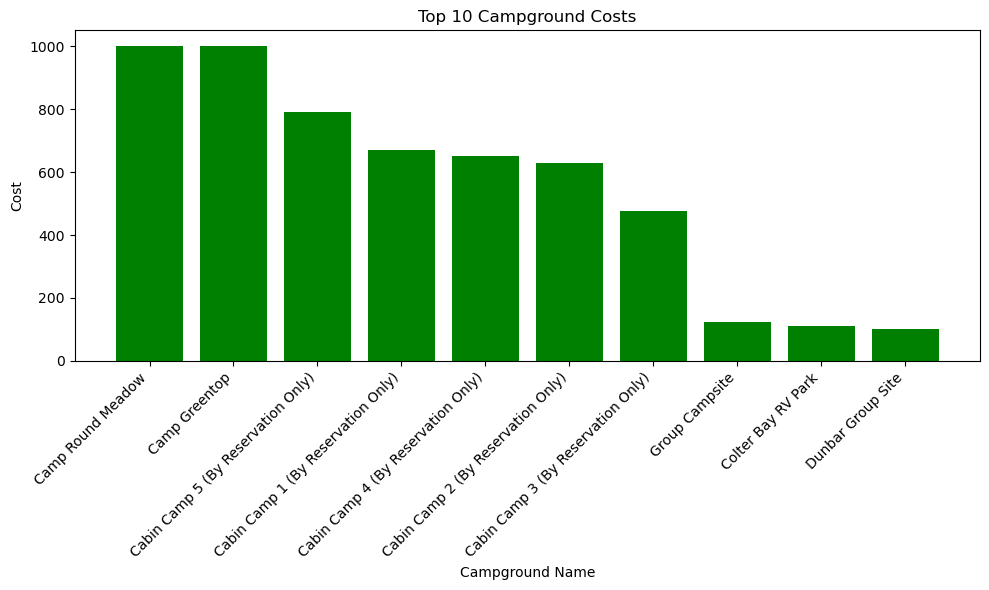

In [226]:
import matplotlib.pyplot as plt
 #Convert 'Cost' column to numeric (remove dollar signs, convert to float)
camp_data['Cost'] = pd.to_numeric(camp_data['Cost'].replace('[\$,]', '', regex=True), errors='coerce')
# Filter out rows where 'Cost' is NaN
camp_data = camp_data.dropna(subset=['Cost'])
# Sort the DataFrame by 'Cost' in descending order and get the top 10
top_costs = camp_data.sort_values(by='Cost', ascending=False).head(10)
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_costs['Name'], top_costs['Cost'], color='green')
plt.xlabel('Campground Name')
plt.ylabel('Cost')
plt.title('Top 10 Campground Costs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [227]:
# Filter out rows where 'Cost' is NaN
camp_data = camp_data.dropna(subset=['Cost'])
# Find the index of the maximum value in the 'Cost' column
max_cost_index = camp_data['Cost'].idxmax()
# Access the row corresponding to the maximum cost using loc
row_with_max_cost = camp_data.loc[max_cost_index]
print("Row with the highest cost:")
print(row_with_max_cost)
#Thurmont MD

Row with the highest cost:
ID                                        D378656F-72C7-4F18-A3CC-741CBEE9B394
Name                                                             Camp Greentop
Park Code                                                                 cato
Latitude                                                     39.64454144079283
Longitude                                                    -77.4765647339641
Number Of Sites Reservable                                                   1
Number Of Sites First Come First Serve                                       1
Accessibility Classifications                           [Developed Campground]
Cost                                                                    1000.0
Zip                                                                      21788
City                                                                  Thurmont
Name: 103, dtype: object


In [248]:
# Find the top 10 most expensive campgrounds
top_10_expensive = camp_data.nlargest(10, 'Cost')
print("Top 10 most expensive campgrounds:")
print(top_10_expensive)

Top 10 most expensive campgrounds:
     Unnamed: 0                                    ID  \
103         103  D378656F-72C7-4F18-A3CC-741CBEE9B394   
105         105  905221FE-094D-4E73-90EB-205CBCAD69AA   
95           95  2D5D7B26-19D2-4583-A370-86575EA22C2F   
91           91  9CAD260F-57A8-4814-87FA-E61D14108C81   
94           94  67817EE3-C197-45DD-AEF0-E5E86061691B   
92           92  CBA8D848-FB74-4492-9E5D-E1E4979A976B   
93           93  B26D8D06-514E-4230-A314-CF0ED2023B98   
254         254  6A989D7D-8AA1-432E-A915-337BB2B45E4C   
141         141  2E829940-0ECC-49A7-85FB-F0AE8D45EBA0   
178         178  665A07F7-CD99-401A-8674-4C65AC41954C   

                                   Name Park Code   Latitude   Longitude  \
103                       Camp Greentop      cato  39.644541  -77.476565   
105                   Camp Round Meadow      cato  39.644917  -77.487628   
95   Cabin Camp 5 (By Reservation Only)      prwi  38.575779  -77.412568   
91   Cabin Camp 1 (By Reservation

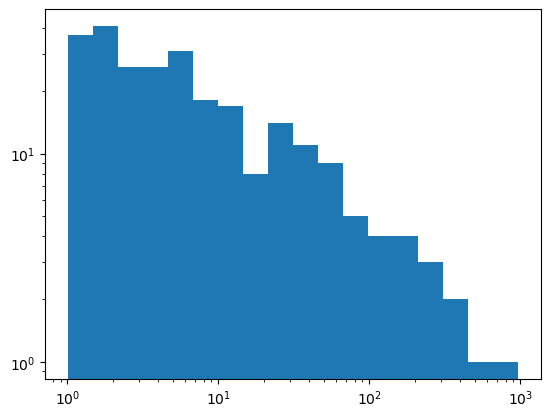

In [232]:
import numpy as np
import matplotlib.pyplot as plt
camp_data = 10**np.random.normal(size=500)
_, bins = np.histogram(np.log10(camp_data + 1), bins='auto')
plt.hist(camp_data, bins=10**bins);
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

In [2]:
import pandas as pd
camp_data = pd.read_csv('C:\\Users\\bekah\\github-classroom\\s386Fall2023\\lab-06-bekahwebb\\nps_camp.csv')
camp_data

,Unnamed: 0,ID,Name,Park Code,Latitude,Longitude,Number Of Sites Reservable,Number Of Sites First Come First Serve,Accessibility Classifications,Cost,Zip,City
0,0,EA81BC45-C361-437F-89B8-5C89FB0D0F86,277 North Campground,amis,29.512374,-100.908166,1,17,['Limited Development Campground'],6.0,NaN,NaN
1,1,1241C56B-7003-4FDF-A449-29DA8BCB0A41,Abrams Creek Campground,grsm,35.610747,-83.933183,16,0,['Developed Campground'],30.0,37878,Tallassee
2,2,ABDC6E2A-9959-4A4C-9DB6-EEF66E7C95B8,Adirondack Shelters,cato,39.677750,-77.484627,2,0,['Primitive Camping Areas'],10.0,21788,Thurmont
3,3,4F9ED6A5-3ED1-443D-9E4C-859D7988F199,Afterbay Campground,bica,45.315438,-107.941659,22,0,['Limited Development Campground'],35.0,59035,Fort Smith
4,4,9FAE941D-D7E8-4F36-A28F-8556628242BA,Akers Group Campground,ozar,37.376455,-91.561546,4,4,['Designated Primitive Campsites'],65.0,65466,Eminence
...,...,...,...,...,...,...,...,...,...,...,...,...
633,633,A1EAF11C-75D8-484B-8BB2-985F61951BAD,Wood Lake Campground,isro,48.008535,-88.739609,0,3,['Primitive Camping Areas'],0.0,49931,Houghton
634,634,B94FE8B9-2EF1-4464-A2E1-5803C9AE7648,Woolum,buff,35.970311,-92.880520,0,0,['Primitive Camping Areas'],0.0,72675,St. Joe
635,635,BF1E54D4-20CA-48F4-85ED-DBE673A14696,Worthington State Forest Campground,dewa,41.012960,-75.084844,78,0,[],NaN,07832,Columbia
636,636,CCDC908D-4B98-46C9-83BB-AFE6EF2E9869,Yankee Paradise Wilderness Campsite,cuis,30.849200,-81.447800,4,0,['Designated Primitive Campsites'],9.0,NaN,NaN


In [279]:
camp_data.describe()

,Latitude,Longitude,Number Of Sites Reservable,Number Of Sites First Come First Serve,Cost
count,635.000000,635.000000,638.000000,638.000000,597.000000
mean,40.084582,-100.358931,32.307210,26.783699,27.773702
std,6.834587,21.419906,61.006392,396.299801,82.856382
min,18.352310,-156.237592,0.000000,0.000000,0.000000
25%,36.044605,-115.914752,0.000000,0.000000,5.000000
50%,38.585183,-104.770314,3.000000,0.000000,20.000000
75%,45.884010,-83.701960,36.000000,10.000000,28.000000
max,63.733360,154.177000,432.000000,10000.000000,1000.000000


In [273]:
#Correlation Matrix
#A correlation matrix takes the numerical variables and finds the correlation between two variables at a time. The code below creates a correlation matrix and the following output:
camp_data.corr()

C:\Users\bekah\AppData\Local\Temp\ipykernel_20504\3348911441.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  camp_data.corr()


,Latitude,Longitude,Number Of Sites Reservable,Number Of Sites First Come First Serve,Cost
Latitude,1.000000,-0.071330,0.004874,-0.022480,-0.028497
Longitude,-0.071330,1.000000,-0.109048,-0.024575,0.080968
Number Of Sites Reservable,0.004874,-0.109048,1.000000,-0.018321,0.023920
Number Of Sites First Come First Serve,-0.022480,-0.024575,-0.018321,1.000000,-0.010007
Cost,-0.028497,0.080968,0.023920,-0.010007,1.000000


In [ ]:
#cost has a high corr with longitude and number of sites reservable

In [4]:
camp_data.columns

Index(['ID', 'Name', 'Park Code', 'Latitude', 'Longitude',
       'Number Of Sites Reservable', 'Number Of Sites First Come First Serve',
       'Accessibility Classifications', 'Cost', 'Zip', 'City'],
      dtype='object')

In [3]:
# Assuming 'camp_data' is your Pandas DataFrame
camp_data.drop(columns=['Unnamed: 0'], inplace=True)


In [283]:
# Create an empty dictionary to store dataframes for each region
region_datasets = {}

# Loop through each unique two-digit prefix in the Zip column
for prefix in camp_data['Zip'].apply(lambda x: str(x)[:2]).unique():
  
    # Filter the dataframe for the current region
    region_data = camp_data[camp_data['Zip'].apply(lambda x: str(x).startswith(prefix))]
  
    # Store the filtered dataframe in the dictionary
    region_datasets["Region_" + prefix] = region_data

# Accessing the filtered dataframes for specific regions (replace 'xx' with the desired region code)
region_89_data = region_datasets["Region_89"]
region_89_data

,ID,Name,Park Code,Latitude,Longitude,Number Of Sites Reservable,Number Of Sites First Come First Serve,Accessibility Classifications,Cost,Zip,City
68,D0B26144-86D6-4F31-9296-4455BA0A3DDB,Boulder Beach Campground (Lake Mead),lake,36.036950,-114.801917,126,9,['Developed Campground'],20.0,89005,Boulder City
69,726B4856-7914-4952-BF9F-C3D48D0E5712,Boulder Beach Group Campground (Lake Mead),lake,36.037525,-114.802573,5,0,['Developed Campground'],80.0,89005,Boulder City
101,8131F253-D893-42FA-A162-4CDE07363AD5,Callville Bay RV Park (Lake Mead),lake,36.143263,-114.725594,0,0,['Developed Campground'],NaN,89040,Overton
188,FBCE7DA5-896A-4A5B-939E-4AEACC63CC76,Echo Bay Campground (Lake Mead),lake,36.308137,-114.436898,0,37,['Developed Campground'],20.0,89005,Boulder City
337,2358E196-5E36-4A03-842F-C2C6FE81EFFD,Las Vegas Bay Campground (Lake Mead),lake,36.127845,-114.872570,0,84,['Developed Campground'],20.0,89005,Boulder City
573,3A3A571D-14D7-4939-91A2-026756CFC2A7,Temple Bar Campground (Lake Mead),lake,36.030318,-114.324852,0,0,[],20.0,89005,Boulder City


In [23]:

# Create an empty dictionary to store lists of zip codes for each region
region_zip_codes = {}
# Loop through each unique two-digit prefix in the Zip column
for prefix in camp_data['Zip'].apply(lambda x: str(x)[:2]).unique():
    # Filter the dataframe for the current region
    region_data = camp_data[camp_data['Zip'].apply(lambda x: str(x).startswith(prefix))]
    # Extract the zip codes for the current region
    zip_codes = region_data['Zip'].tolist()
    # Store the zip codes in the dictionary
    region_zip_codes["Region_" + prefix] = zip_codes


In [27]:
camp_data.columns

Index(['ID', 'Name', 'Park Code', 'Latitude', 'Longitude',
       'Number Of Sites Reservable', 'Number Of Sites First Come First Serve',
       'Accessibility Classifications', 'Cost', 'Zip', 'City', 'Region'],
      dtype='object')

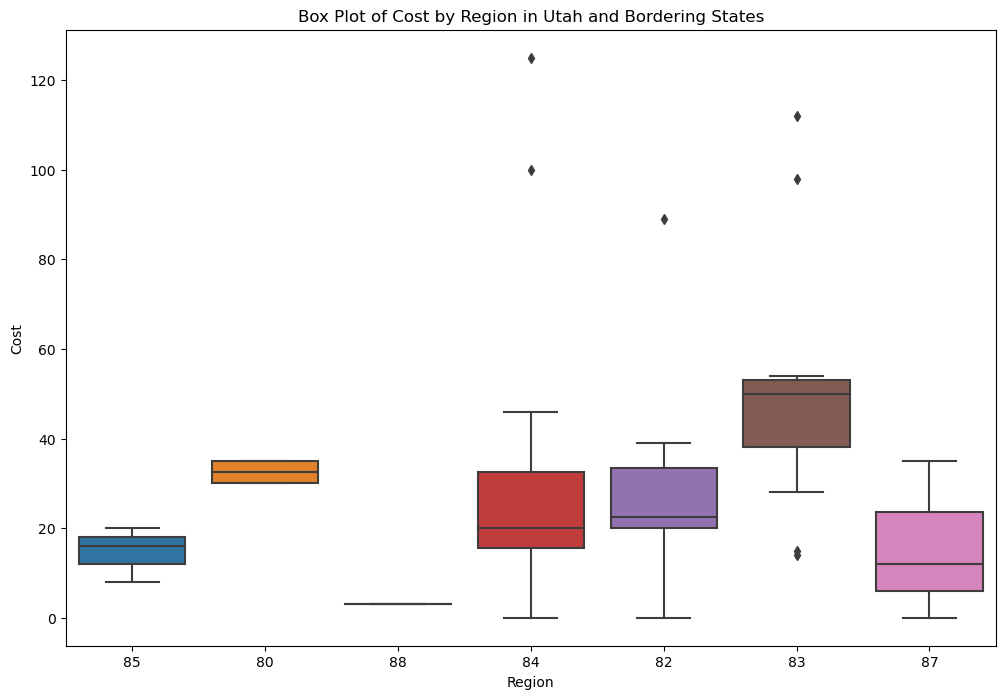

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# List of state codes for Utah and its neighboring Regions
utah_and_neighbors = ['84', '83', '82', '80', '87', '85', '88']
# Filter data for regions in Utah and its neighboring states
utah_and_neighbors_data = camp_data[camp_data['Region'].isin(utah_and_neighbors)]
# Set up a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Cost', data=utah_and_neighbors_data)
plt.title('Box Plot of Cost by Region in Utah and Bordering States')
plt.xlabel('Region')
plt.ylabel('Cost')
plt.show()

In [293]:
import pandas as pd
# Group by region and calculate the mean cost for each region
region_costs = camp_data.groupby('Region')['Cost'].mean().reset_index()
# Sort the regions by cost in descending order (top regions first)
top_regions = region_costs.sort_values(by='Cost', ascending=False)
# Display the top regions by cost
print("Top Regions by Cost:")
print(top_regions.head())
# Sort the regions by cost in ascending order (least regions first)
least_regions = region_costs.sort_values(by='Cost')
# Display the least regions by cost
print("\nLeast Regions by Cost:")
print(least_regions.head())


Top Regions by Cost:
   Region        Cost
22     55  237.500000
7      22  208.833333
2      07   70.000000
6      21   63.421053
35     83   51.818182

Least Regions by Cost:
   Region  Cost
27     68   0.0
3      17   0.0
17     38   0.0
5      20   2.5
40     88   3.0


C:\Users\bekah\AppData\Local\Temp\ipykernel_20504\528752639.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=camp_data, x='Region', y='Cost', palette='viridis')


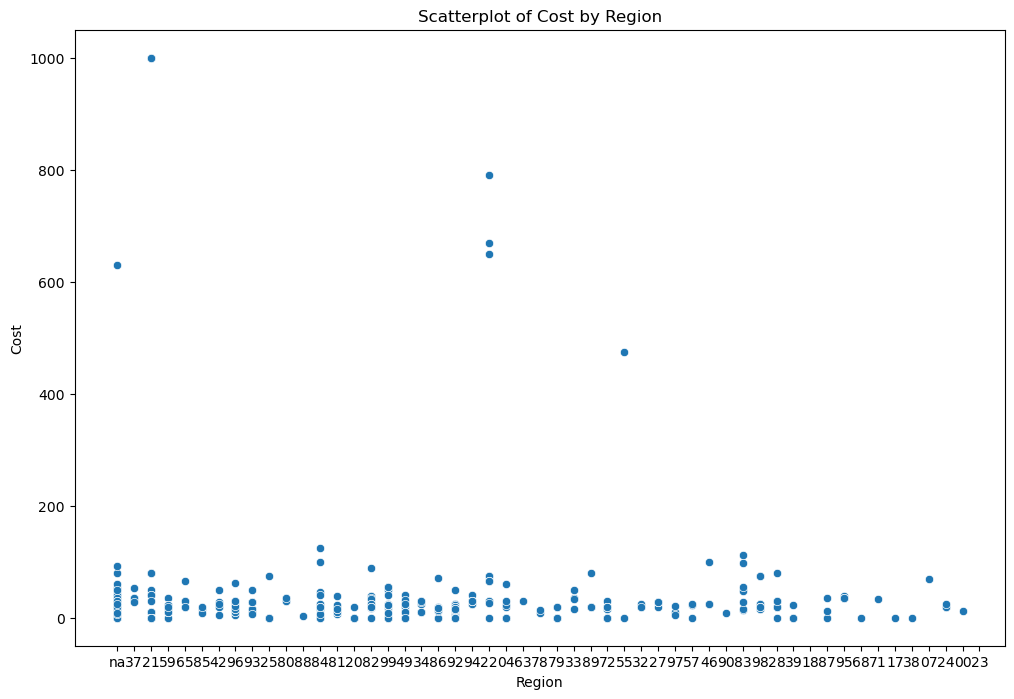

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'camp_data' is your dataframe and 'Cost' and 'Region' are the columns you want to plot

# Create a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=camp_data, x='Region', y='Cost', palette='viridis')
plt.title('Scatterplot of Cost by Region')
plt.xlabel('Region')
plt.ylabel('Cost')
plt.show()


C:\Users\bekah\AppData\Local\Temp\ipykernel_20504\2532830086.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=camp_data, y='Region', x='Cost', ci=None, orient='h', order=order)


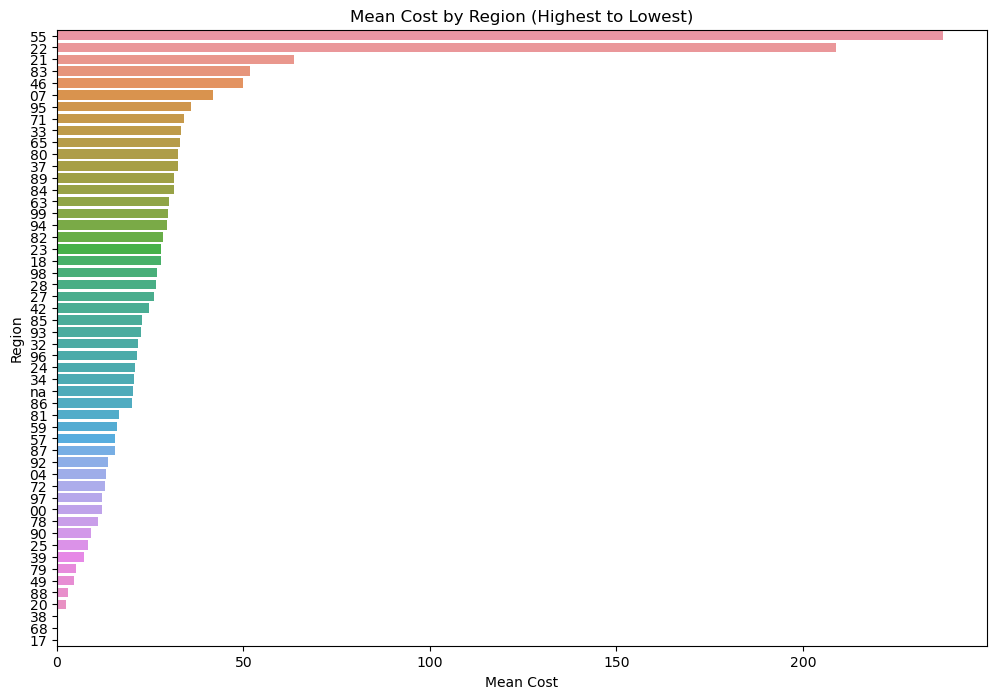

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt
# Replace non-numeric values with NaN
camp_data['Cost'] = pd.to_numeric(camp_data['Cost'], errors='coerce')
# Fill NaN values with the mean cost
mean_cost = camp_data['Cost'].mean()
camp_data['Cost'].fillna(mean_cost, inplace=True)
# Order the regions by mean cost from highest to lowest
order = camp_data.groupby('Region')['Cost'].mean().sort_values(ascending=False).index
# Create a horizontal bar plot of mean Cost by Region
plt.figure(figsize=(12, 8))
sns.barplot(data=camp_data, y='Region', x='Cost', ci=None, orient='h', order=order)
plt.title('Mean Cost by Region (Highest to Lowest)')
plt.xlabel('Mean Cost')
plt.ylabel('Region')
plt.show()


In [284]:
import pandas as pd


# Calculate summary statistics for each region
summary_stats = {}
for region, region_data in region_datasets.items():
    summary_stats[region] = {
        'Mean_Cost': region_data['Cost'].mean(),
        'Median_Cost': region_data['Cost'].median(),
        'Min_Cost': region_data['Cost'].min(),
        'Max_Cost': region_data['Cost'].max(),
    }

# Create a dataframe from the summary statistics
summary_df = pd.DataFrame(summary_stats).T

# Display the summary dataframe
print(summary_df)


            Mean_Cost  Median_Cost  Min_Cost  Max_Cost
Region_na   19.387584         14.0       0.0     630.0
Region_37   32.833333         30.0      28.0      53.0
Region_21   63.421053          0.0       0.0    1000.0
Region_59   16.062500         17.5       0.0      35.0
Region_65   33.000000         30.0      20.0      65.0
Region_85   14.666667         16.0       8.0      20.0
Region_42   24.666667         22.5       5.0      50.0
Region_96   21.250000         20.0       5.0      62.0
Region_93   22.476190         28.0       6.0      50.0
Region_25    8.333333          0.0       0.0      75.0
Region_80   32.500000         32.5      30.0      35.0
Region_88    3.000000          3.0       3.0       3.0
Region_84   31.733333         20.0       0.0     125.0
Region_81   16.727273         16.0       6.0      38.0
Region_20    2.500000          0.0       0.0      20.0
Region_82   28.500000         22.5       0.0      89.0
Region_99   29.640909         23.0       0.0      55.0
Region_49 

In [286]:
summary_df.columns

Index(['Mean_Cost', 'Median_Cost', 'Min_Cost', 'Max_Cost'], dtype='object')

In [36]:
park_code_counts = camp_data['Park Code'].value_counts().max
park_code_counts

<bound method NDFrame._add_numeric_operations.<locals>.max of choh    37
isro    36
piro    25
laro    21
kaww    17
        ..
chcu     1
drto     1
gari     1
gree     1
cuga     1
Name: Park Code, Length: 119, dtype: int64>

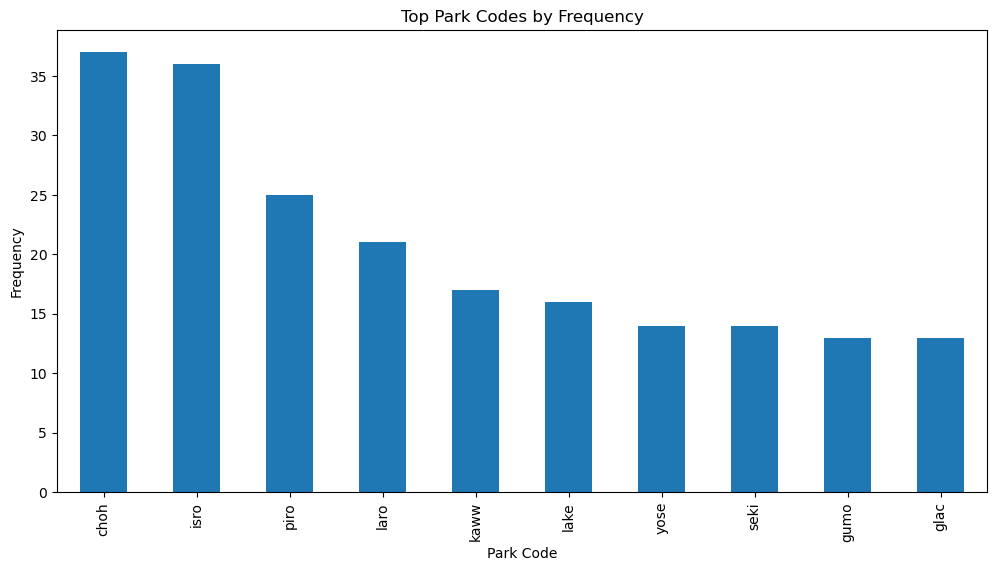

In [37]:
import matplotlib.pyplot as plt


top_park_codes = camp_data['Park Code'].value_counts().nlargest(10)  # Change 10 to the desired number of top Park Codes
plt.figure(figsize=(12, 6))
top_park_codes.plot(kind='bar')
plt.title('Top Park Codes by Frequency')
plt.xlabel('Park Code')
plt.ylabel('Frequency')
plt.show()


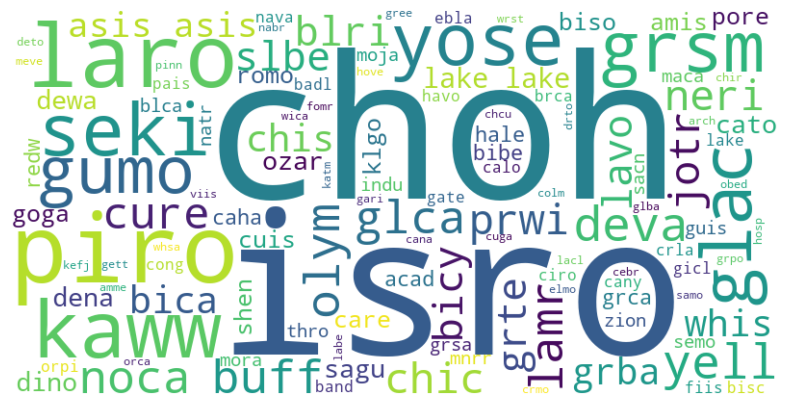

In [34]:
from wordcloud import WordCloud
park_code_text = ' '.join(camp_data['Park Code'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(park_code_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#streamlit camp_app.py
#dashboard code
import streamlit as st
import pandas as pd
import plotly.express as px

st.cache_data.clear()
# Read the CSV file into a DataFrame
camp_data = pd.read_csv('nps_camp.csv')
# Display top regions by average cost
top_regions = camp_data.groupby('City')['Cost'].mean().nlargest(5).reset_index()
st.title("National Park Costs for Camping:")
st.subheader("Module 1:")
st.write("Top US Cities by Average Cost of Nearby National Park Campgrounds")
st.dataframe(top_regions)
# Create an input for selecting a city
st.subheader("Average Cost of Nearby National Park Campgrounds") 
selected_city = st.selectbox('Select a US City', camp_data['City'].unique())


# Filter data for the selected city and plot the cost
city_data = camp_data[camp_data['City'] == selected_city]
if not city_data.empty:
    fig = px.scatter(city_data, x='Park Code', y='Cost', color='City',
                     color_discrete_sequence=px.colors.qualitative.Set2,
                     labels={'Cost': 'Cost'})
    st.plotly_chart(fig)
else:
    st.write(f'No data found for {selected_city}')

# Display top costs by zip code count
top_costs = camp_data.groupby('Cost')['Zip'].count().nlargest(5).reset_index()
st.subheader("Module 2:")
st.write("Number of Zipcodes with a Campground of a Certain 'Cost'")
st.dataframe(top_costs)
# Create an input for selecting a cost
selected_cost = st.selectbox('Select a Campground Cost', camp_data['Cost'].unique())
# Filter data for the selected cost and display it
cost_data = camp_data[camp_data['Cost'] == selected_cost]
if not cost_data.empty:
    st.write(f'Data for Cost {selected_cost}')
    st.dataframe(cost_data)
else:
    st.write(f'No data found for Cost {selected_cost}')

# Sidebar with filter options
st.sidebar.header('Filter Options')
# Multi-select widget for selecting 'Park Codes'
selected_park_codes = st.sidebar.multiselect('Select Park Codes to view Lat, Long, and Cost', camp_data['Park Code'].unique())
# Filter data based on selected 'Park Codes'
selected_columns = ["Latitude", "Longitude", "Park Code", "Cost"]
filtered_data = camp_data[selected_columns]
filtered_data = filtered_data.dropna()
filtered_data = filtered_data[filtered_data['Park Code'].isin(selected_park_codes)]
# Display the filtered data in a table
st.subheader("Module 3:")
st.write("Filtered Data for Parks: Latitude, Longitude, Park Codes, and Cost (See left drop down window):")
st.table(filtered_data)
# Display the map with all markers (not filtered)
#st.cache_data.clear()
#st.map.clear()
st.subheader("Module 4:")
st.subheader("Map with all the National Park Campsites:")
st.map(camp_data.dropna(), latitude='Latitude', longitude='Longitude', size = "Cost")
